In [1]:
import ex2_loader
import ex2_generator
import numpy as np
import sys
sys.path.append('..')
import nn_DF
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='svg'
from sklearn.metrics import mean_squared_error

In [2]:
PATH_TRAIN='../data/ex2Train.pklz'

x0=np.array([[1],[-1]]); 
dimX=2; N=100; n0=10; eta=0.04; dimY=2

training_data, validation_data, test_data,\
data_mean, data_std, label_mean, label_std=ex2_loader.load_data_wrapper(PATH_TRAIN)
# Prepare test data to predict
test_data_data=[x for x,y in test_data]
test_data_label=[y for x,y in test_data]
test_data_label=np.array(test_data_label)
test_data_label=test_data_label.reshape(len(test_data_label),2)
len(training_data)

16956

### Build network

In [3]:
# The num of first layer is n0*dimY, the num of last layer is dimX.
net=nn_DF.Network([n0*dimY, 32, 16, 8, 8, dimX])
epoch=200

In [4]:
tcMSE_EpochAdalr1, tcRel_EpochAdalr1, ecMSE_EpochAdalr1, ecRel_EpochAdalr1, w_EpochAdalr1, b_EpochAdalr1, EpochAdalr1\
=net.SGD_EpochAdalr(training_data, epoch, 64, 0.001, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr5, tcRel_EpochAdalr5, ecMSE_EpochAdalr5, ecRel_EpochAdalr5, w_EpochAdalr5, b_EpochAdalr5, EpochAdalr5\
=net.SGD_EpochAdalr(training_data, epoch, 64, 0.005, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr10, tcRel_EpochAdalr10, ecMSE_EpochAdalr10, ecRel_EpochAdalr10, w_EpochAdalr10, b_EpochAdalr10, EpochAdalr10\
=net.SGD_EpochAdalr(training_data, epoch, 64, 0.01, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)

-----------------------------
Epoch Adaptive lr begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.0011344668294236463
Epoch 0: 0.5806558426986533
The eta of Epoch 1 is 0.0011803347340987721
Epoch 1: 0.3551399634297548
The eta of Epoch 2 is 0.0011344632524237887
Epoch 2: 0.20520803855888664
The eta of Epoch 3 is 0.001174200442639072
Epoch 3: 0.13163976427852747
The eta of Epoch 4 is 0.0011999045657574388
Epoch 4: 0.09470280345753355
The eta of Epoch 5 is 0.0012460242232446765
Epoch 5: 0.07090696042566827
The eta of Epoch 6 is 0.001518250047927564
Epoch 6: 0.05226641499108588
The eta of Epoch 7 is 0.002179910084506762
Epoch 7: 0.036071959879163056
The eta of Epoch 8 is 0.002278643582801828
Epoch 8: 0.021591096873383123
The eta of Epoch 9 is 0.0023215374127424034
Epoch 9: 0.018482535376386028
The eta of Epoch 10 is 0.002345699039792265
Epoch 10: 0.017093340467585292
The eta of Epoch 11 is 0.002406490468212695
Epoch 11: 0.016506520850442546
The eta of Epoch 12 is 0.0024512695789243545


In [5]:
tcMSE_constlr1, tcRel_constlr1, ecMSE_constlr1, ecRel_constlr1, w_constlr1, b_constlr1,constlr1\
=net.SGD_Constlr(training_data, epoch, 64, 0.001, evaluation_data=validation_data)
tcMSE_constlr5,tcRel_constlr5, ecMSE_constlr5,ecRel_constlr5, w_constlr5, b_constlr5, constlr5\
=net.SGD_Constlr(training_data, epoch, 64, 0.005, evaluation_data=validation_data)
tcMSE_constlr10, tcRel_constlr10, ecMSE_constlr10,ecRel_constlr10, w_constlr10, b_constlr10, constlr10\
=net.SGD_Constlr(training_data, epoch, 64, 0.01, evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.001
Epoch 0: 0.5840312483500921
The eta of Epoch 1 is 0.001
Epoch 1: 0.37870251508126523
The eta of Epoch 2 is 0.001
Epoch 2: 0.23826995565017536
The eta of Epoch 3 is 0.001
Epoch 3: 0.15421001386404987
The eta of Epoch 4 is 0.001
Epoch 4: 0.1116516001079381
The eta of Epoch 5 is 0.001
Epoch 5: 0.08643313896822104
The eta of Epoch 6 is 0.001
Epoch 6: 0.06759410710325131
The eta of Epoch 7 is 0.001
Epoch 7: 0.05206730114068794
The eta of Epoch 8 is 0.001
Epoch 8: 0.039830128674806155
The eta of Epoch 9 is 0.001
Epoch 9: 0.03059180164375386
The eta of Epoch 10 is 0.001
Epoch 10: 0.024023773092543794
The eta of Epoch 11 is 0.001
Epoch 11: 0.021188575938004856
The eta of Epoch 12 is 0.001
Epoch 12: 0.01924836644375392
The eta of Epoch 13 is 0.001
Epoch 13: 0.018562773373560975
The eta of Epoch 14 is 0.001
Epoch 14: 0.018169043069404416
The eta of Epoch 15 is 0.001
Epoch 15: 0.01764553

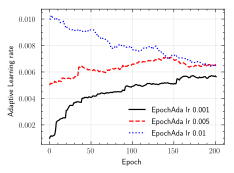

In [9]:
epochs=np.linspace(0,epoch+1,epoch+1)
plt.style.reload_library()
with plt.style.context(['science','ieee']):
    plt.plot(epochs,EpochAdalr1, epochs,EpochAdalr5,epochs, EpochAdalr10,linewidth=1.2)
    plt.grid(alpha=0.35)
    plt.legend(["EpochAda lr 0.001","EpochAda lr 0.005","EpochAda lr 0.01"],edgecolor="black")
    plt.xlabel("Epoch")
    plt.ylabel("Adaptive Learning rate")
plt.savefig("../img/ex2-lr.pdf", dpi=600,bbox_inches = 'tight')

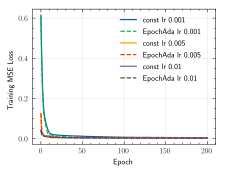

In [8]:
Epochs=np.linspace(0,epoch,epoch)
plt.style.reload_library()
with plt.style.context(['science','ieee','std-colors']):
    plt.plot(Epochs, tcMSE_constlr1, Epochs, tcMSE_EpochAdalr1,"--", Epochs, tcMSE_constlr5,\
         Epochs,tcMSE_EpochAdalr5,'--',Epochs, tcMSE_constlr10,Epochs,tcMSE_EpochAdalr10,'--',linewidth=1.2)
    plt.grid(alpha=0.35)    
    plt.legend(["const lr 0.001","EpochAda lr 0.001","const lr 0.005","EpochAda lr 0.005","const lr 0.01","EpochAda lr 0.01"],edgecolor="black")
    plt.xlabel("Epoch")
    plt.ylabel("Training MSE Loss")
    
plt.savefig("../img/ex2-loss.pdf", dpi=600,bbox_inches = 'tight')

### Compute relative errors

In [10]:
def relative_err(y_true, y_pred):
    """Compute Relative Error"""
    abs_sum=np.sum(np.abs(y_true-y_pred))
    return abs_sum/(np.sum(np.abs(y_true))+np.sum(np.abs(y_pred)))

def ComputeError(pred, label,label_mean, label_std, dimX):
    pred=np.array(pred)
    pred=pred.reshape(len(pred),dimX)
    for k in range(len(pred)):
        pred[k,:]=pred[k,:]*label_std+label_mean
    RelErr=relative_err(pred, label)
    mseErr=mean_squared_error(pred, label)
    print("MSE and RelErr are: {0},{1}".format(mseErr, RelErr))

Repeat Monte Carlo 256 times to compute the average relative error on new-generated data

In [11]:
import ex2_generator
N_sample=256
P= np.array([[0.98,0.02],[0.02,0.98]])

TotalDatas=[]; TotalLabels=np.zeros(((N-n0+2)*N_sample,dimX))
for i in range(256):
    alpha=ex2_generator.mChain(N,P)
    datas1, labels1, x_new1=ex2_generator.generate_new_data(data_mean, data_std,alpha)
    TotalDatas.extend(datas1)
    x_new1=x_new1[n0-1:]
    TotalLabels[i*(N-n0+2):(i+1)*(N-n0+2)]=x_new1

In [12]:
NewPred_constlr1=net.predict(TotalDatas, w_constlr1, b_constlr1, label=False)
NewPred_constlr5=net.predict(TotalDatas, w_constlr5, b_constlr5, label=False)
NewPred_constlr6=net.predict(TotalDatas, w_constlr10, b_constlr10, label=False)
NewPred_EpochAdalr1=net.predict(TotalDatas, w_EpochAdalr1, b_EpochAdalr1, label=False)
NewPred_EpochAdalr5=net.predict(TotalDatas, w_EpochAdalr5, b_EpochAdalr5, label=False)
NewPred_EpochAdalr10=net.predict(TotalDatas, w_EpochAdalr10, b_EpochAdalr10, label=False)

ComputeError(NewPred_constlr1, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_constlr5, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_constlr6, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr1, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr5, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr10, TotalLabels, label_mean, label_std, dimX)

MSE and RelErr are: 5.6618015265901445,0.0732686201222205
MSE and RelErr are: 4.199405269212707,0.06127419213079442
MSE and RelErr are: 4.022029711147989,0.05708913869054841
MSE and RelErr are: 4.323695953320903,0.06132401551185153
MSE and RelErr are: 3.9539817914306625,0.05877695541282677
MSE and RelErr are: 3.7814740367925603,0.05727951936042109


### Plot sample path

According to the evolution of the adaptive learning rate, it converges to around 0.0035.
We retrain the model with learning rate 0.0035.

In [49]:
np.random.seed(8)
ru=np.random.uniform(0,1,size=N)
P= np.array([[0.98,0.02],[0.02,0.98]])
alpha=ex2_generator.mChain(N,P,ru)

datas, labels, x_new =ex2_generator.generate_new_data(data_mean, data_std, alpha)

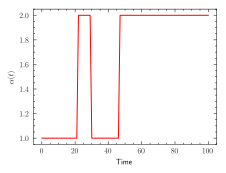

In [50]:
plt.style.reload_library()
with plt.style.context(['science','ieee']):
    plt.plot(alpha,'r')
    plt.xlabel("Time")
    plt.ylabel(r'$ \alpha (t) $')
plt.savefig("../img/ex2-alpha.pdf", dpi=600,bbox_inches = 'tight')

In [39]:
tcMSE_constlr, tcRel_constlr, ecMSE_constlr, ecRel_constlr, w_constlr, b_constlr, constlr\
=net.SGD_Constlr(training_data, epoch, 64, 0.006, evaluation_data=validation_data)
tcMSE_EpochAdalr, tcRel_EpochAdalr, ecMSE_EpochAdalr, ecRel_EpochAdalr, w_EpochAdalr, b_EpochAdalr, EpochAdalr\
=net.SGD_EpochAdalr(training_data, epoch, 64, 0.006, 0.001, 0.01, evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.006
The eta of Epoch 0 is 0.006
Epoch 0: 0.0859371252850207
The eta of Epoch 1 is 0.006
Epoch 1: 0.021474710693737135
The eta of Epoch 2 is 0.006
Epoch 2: 0.01728706457520305
The eta of Epoch 3 is 0.006
Epoch 3: 0.014985872669833934
The eta of Epoch 4 is 0.006
Epoch 4: 0.014484508889473361
The eta of Epoch 5 is 0.006
Epoch 5: 0.013211001506918257
The eta of Epoch 6 is 0.006
Epoch 6: 0.012442155121714609
The eta of Epoch 7 is 0.006
Epoch 7: 0.012515030117960853
The eta of Epoch 8 is 0.006
Epoch 8: 0.011365952971359984
The eta of Epoch 9 is 0.006
Epoch 9: 0.01225247223483631
The eta of Epoch 10 is 0.006
Epoch 10: 0.01091849097176593
The eta of Epoch 11 is 0.006
Epoch 11: 0.010534288485385833
The eta of Epoch 12 is 0.006
Epoch 12: 0.00947964146115589
The eta of Epoch 13 is 0.006
Epoch 13: 0.008858600097519183
The eta of Epoch 14 is 0.006
Epoch 14: 0.009644850583487487
The eta of Epoch 15 is 0.006
Epoch 15: 0.00

In [51]:
pr_const=net.predict(datas,w_constlr, b_constlr,label=False)
pr_const=np.array(pr_const)
pr_const=pr_const.reshape(len(pr_const),dimX)
for k in range(N-n0+2):
    pr_const[k,:]=pr_const[k,:]*label_std+label_mean
    
const_new=[x0 for k in range(n0-1)]
const_new=np.array(const_new)
const_new=const_new.reshape(n0-1,dimX)
const_new=np.vstack((const_new,pr_const))

In [52]:
pr_ada=net.predict(datas,w_EpochAdalr, b_EpochAdalr,label=False)
pr_ada=np.array(pr_ada)
pr_ada=pr_ada.reshape(len(pr_ada),dimX)
for k in range(N-n0+2):
    pr_ada[k,:]=pr_ada[k,:]*label_std+label_mean
ada_new=[x0 for k in range(n0-1)]
ada_new=np.array(ada_new)
ada_new=ada_new.reshape(n0-1,dimX)
ada_new=np.vstack((ada_new,pr_ada))

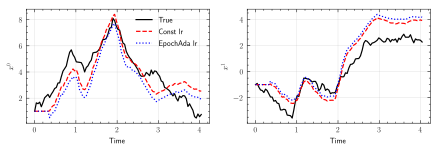

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'
axis=np.linspace(0,eta*(N+1),N+1)
plt.style.reload_library()
with plt.style.context(['science','ieee']):

    fig, ax=plt.subplots(1,2, figsize=(6,2),constrained_layout=True)
    ax[0].plot(axis,x_new[:,0],axis,const_new[:,0],axis, ada_new[:,0],linewidth=1.2)
    ax[0].minorticks_on()
    ax[0].set_xlabel('Time'); ax[0].set_ylabel('$x^0$')
    ax[0].grid(alpha=0.35)

    ax[1].plot(axis, x_new[:,1],axis, const_new[:,1],axis, ada_new[:,1],linewidth=1.2)
    ax[1].minorticks_on()
    ax[1].set_xlabel('Time'); ax[1].set_ylabel('$x^1$')

    ax[1].grid(alpha=0.35)
    ax[0].legend(["True","Const lr","EpochAda lr"],prop={'size':8},edgecolor="black")
    
plt.savefig("../img/ex2-path.pdf", dpi=600,bbox_inches = 'tight')

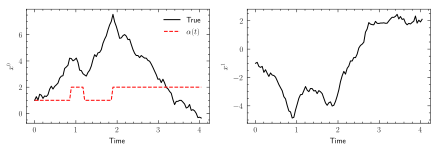

In [38]:
plt.style.reload_library()
with plt.style.context(['science','ieee']):

    fig, ax=plt.subplots(1,2, figsize=(6,2),constrained_layout=True)

    axis=np.linspace(0,eta*(N+1),N+1)
    ax[0].plot(axis,x_new[:,0],axis, alpha,linewidth=1.0)
    ax[0].minorticks_on()
    ax[0].set_xlabel('Time'); ax[0].set_ylabel('$x^0$')

    ax[1].plot(axis, x_new[:,1],linewidth=1.0)
    ax[1].minorticks_on()
    ax[1].set_xlabel('Time'); ax[1].set_ylabel('$x^1$')
    ax[0].legend(["True",r'$\alpha(t)$'],prop={'size':8},edgecolor="black")